In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.table import Table
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import ScalarFormatter
import cmasher as cmr

import matplotlib.patheffects as PathEffects
plt.rcParams['figure.dpi'] = 300


16231
14079
223


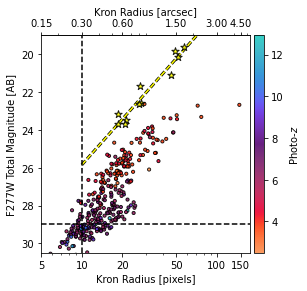

[16, 36, 370, 478, 531, 575, 778, 801, 806, 830, 845, 877, 893, 922, 1007, 1072, 1076, 1304, 1367, 1381, 1393, 1437, 1438, 1463, 1526, 1623, 1709, 1723, 1838, 1867, 1927, 1941, 1951, 2049, 2171, 2267, 2393, 2439, 2485, 2643, 2779, 2808, 2945, 2957, 2979, 2994, 3217, 3307, 3308, 3318, 3319, 3360, 3419, 3639, 3748, 3845, 3908, 3983, 4013, 4040, 4089, 4104, 4114, 4143, 4201, 4234, 4361, 4403, 4456, 4562, 4688, 4741, 4823, 4834, 4868, 5127, 5138, 5193, 5274, 5359, 5371, 5529, 5551, 5586, 5591, 5611, 5671, 5799, 5806, 5869, 5990, 6065, 6074, 6108, 6150, 6157, 6201, 6213, 6259, 6265, 6285, 6300, 6385, 6496, 6584, 6678, 6744, 6882, 6941, 6962, 7043, 7136, 7151, 7236, 7246, 7339, 7389, 7526, 7540, 7856, 7893, 8277, 8358, 8528, 8628, 8730, 8789, 8798, 8846, 8854, 8885, 9036, 9071, 9080, 9196, 9243, 9280, 9281, 9350, 9663, 9809, 9911, 9995, 10069, 10092, 10118, 10130, 10144, 10145, 10152, 10248, 10376, 10441, 10452, 10484, 10612, 10628, 10631, 10740, 10806, 10813, 10816, 10818, 10882, 10896, 110

(array([201.,  11.,   3.,   3.,   2.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 65.        ,  80.19999695,  95.40000153, 110.59999847,
        125.80000305, 141.        , 156.19999695, 171.3999939 ,
        186.6000061 , 201.80000305, 217.        , 232.19999695,
        247.3999939 , 262.6000061 , 277.79998779, 293.        ,
        308.20001221, 323.3999939 , 338.6000061 , 353.79998779,
        369.        ]),
 <BarContainer object of 20 artists>)

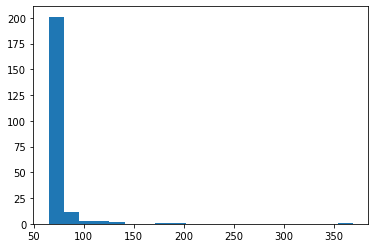

In [8]:
path_cat = '/raid/scratch/work/austind/GALFIND_WORK/Catalogues/v11/ACS_WFC+NIRCam/JOF_psfmatched/JOF_psfmatched_MASTER_Sel-F277W+F356W+F444W_v11_total.fits'

cat = Table.read(path_cat)
print(len(cat))
masks = [col for col in cat.colnames if 'unmasked_' in col]
for mask in masks:
    cat = cat[cat[mask] == True]
print(len(cat))

# Define the selection criteria
cat = cat[cat['EPOCHS'] == True]
selection = lambda c: (c['MAG_APER_F277W_TOTAL'] < 29) & (c['kron_radius_F277W+F356W+F444W'] > 10) & (c['EPOCHS'] == True) 



# Apply the selection

mask = selection(cat)
cat_selected = cat[mask]
print(len(cat_selected))
color_by = 'zbest_fsps_larson_zfree'


fig, ax = plt.subplots(1, 1, figsize=(4, 4), facecolor='white')
cax = make_axes_locatable(ax).append_axes('right', size='5%', pad=0.05)
# Add top axis
ax.set_xscale('log')

ax_top = ax.secondary_xaxis('top', functions = (lambda x: x*0.03, lambda x: x/0.03))
ax_top.set_xlabel('Kron Radius [arcsec]')
ax.set_xlabel('Kron Radius [pixels]')
ax.set_ylabel(r'F277W Total Magnitude [AB]')

points = ax.scatter(cat['kron_radius_F277W+F356W+F444W'], cat['MAG_APER_F277W_TOTAL'], s=10, c = cat[color_by], cmap='cmr.guppy', alpha=0.9, edgecolor='black', linewidth=0.9)
ax.set_ylim(30.5, 19)
ax_top.set_xscale('log')
y = lambda x: -8.03979 * np.log10(x) + 33.88689 # LOBF for stars
x = np.linspace(10, 150, 100)

ax.plot(x, y(x), c = 'yellow', zorder=1, path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')], linestyle = 'dashed')
fig.colorbar(points, cax=cax, label='Photo-$z$')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks([5, 10, 20, 50, 100, 150])
ax_top.xaxis.set_major_formatter(ScalarFormatter())
ax_top.set_xticks([0.15, 0.3, 0.6, 1.5, 3, 4.5])
ax.axvline(10, color='black', linestyle='--')
ax.axhline(29, color='black', linestyle='--')





stars = Table.read('/nvme/scratch/work/tharvey/catalogs/JOF_psfmatched_PSF_STARS.fits')
ax.scatter(stars['kron_radius_F277W+F356W+F444W_1a'], stars['MAG_APER_F277W_TOTAL'], s=60, color='yellow', alpha=0.9, marker = '*', edgecolor = 'black', linewidth = 1)
plt.savefig('/nvme/scratch/work/tharvey/resolved_sedfitting/plots/kron_radius_vs_mag.png', dpi=300, bbox_inches='tight')

plt.show()

ids_selected = list(cat_selected['NUMBER'].data)
print(ids_selected)
min_cutout_size = 64
cat_selected['CUTOUT_SIZE'] = 2.5 * cat_selected['kron_radius_F277W+F356W+F444W']
cat_selected['CUTOUT_SIZE'] = np.maximum(cat_selected['CUTOUT_SIZE'], min_cutout_size)
# Round them all to be odd

cat_selected['CUTOUT_SIZE'] = np.ceil(cat_selected['CUTOUT_SIZE'])//2 * 2 + 1

cat_selected.write('/nvme/scratch/work/tharvey/resolved_sedfitting/catalogs/JOF_psfmatched_MASTER_Sel-F277W+F356W+F444W_v11_total_selected.fits', overwrite=True)

plt.hist(cat_selected['CUTOUT_SIZE'], bins=20)

In [29]:
import matplotlib
print (matplotlib.__version__)

3.8.4
